# HAPPINESS
___

STAT 201 - Group 12: Anne Nguyen, Eric Pien, Oliver Gullery, Ruby Yang




## Introduction
___

TODO:

#### **Background** ####
* background info on the topic for people unfamiliar with it

#### **Thesis** ####
* clearly state the Q. 

#### **Data** ####
* Identify and describe the dataset

## Preliminary Exploratory Data Analysis
___

### Data Loading, Cleaning, Splitting ###

In [5]:
# Environment Setup
library(tidyverse)
library(tidymodels)
library(GGally)
library(gridExtra)
library(janitor)

options(repr.matrix.max.rows = 6) #limits output of dataframes to 6 rows

In [4]:
# Read data from the web into R
data <- read_csv('https://raw.githubusercontent.com/ericpien/stat-201-project/main/data/DataForTable2.1.csv',skip=0)

# Clean/Wrangle Data
happiness_data <- data |>
    clean_names() |>
    as_tibble() |>
    drop_na()
    
happiness_data

Rows: 2089 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Country name
dbl (11): year, Life Ladder, Log GDP per capita, Social support, Healthy lif...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,confidence_in_national_government
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2008,3.723590,7.302574,0.4506623,50.5,0.7181143,0.1731693,0.8816863,0.4142970,0.2581955,0.6120721
Afghanistan,2009,4.401778,7.472446,0.5523084,50.8,0.6788964,0.1954691,0.8500354,0.4814214,0.2370924,0.6115452
Afghanistan,2010,4.758381,7.579183,0.5390752,51.1,0.6001272,0.1258595,0.7067661,0.5169067,0.2753238,0.2993574
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Zimbabwe,2019,2.693523,8.196998,0.7591623,53.100,0.6319076,-0.08153984,0.8306519,0.6584337,0.2353543,0.4564550
Zimbabwe,2020,3.159802,8.117733,0.7172427,53.575,0.6433030,-0.02937614,0.7885228,0.6606581,0.3457364,0.5773019
Zimbabwe,2021,3.154578,8.153248,0.6851505,54.050,0.6676362,-0.10943901,0.7569452,0.6099172,0.2416819,0.6657032


In [12]:
happiness_data |>
    filter(year %in% c(2019,2021)) |>
    group_by(country_name) |>
    summarise(n=n()) |>
    filter(n>1)

country_name,n
<chr>,<int>
Albania,2
Argentina,2
Armenia,2
⋮,⋮
Uzbekistan,2
Zambia,2
Zimbabwe,2


In [6]:
happiness_data_wide <- happiness_data |> 
    group_by(country_name,year) |>
    summarize(mean_life_ladder = mean(life_ladder)) |>
    pivot_wider(names_from = year,
                values_from = mean_life_ladder)

happiness_data_wide

`summarise()` has grouped output by 'country_name'. You can override using the
`.groups` argument.


country_name,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2007,2020,2021,2006,2005
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,3.72359,4.401778,4.758381,3.831719,3.782938,3.572100,3.130896,3.982855,4.220169,2.661718,2.694303,2.375092,NA,NA,NA,NA,NA
Albania,NA,NA,NA,NA,5.510124,4.550648,4.813763,4.606651,4.511101,4.639548,5.004403,4.995318,4.634252,5.36491,5.255482,NA,NA
Angola,NA,NA,NA,5.589001,4.360250,3.937107,3.794838,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Yemen,NA,4.809259,4.350313,3.746256,4.060601,4.217679,3.967958,2.982674,NA,NA,3.057514,NA,NA,NA,NA,NA,NA
Zambia,4.730263,5.260361,NA,4.999114,5.013375,5.243996,4.345837,4.843164,4.347544,3.932777,4.041488,3.306797,3.998293,4.837992,3.082155,4.824455,NA
Zimbabwe,3.174264,4.055914,4.681570,4.845642,4.955101,4.690188,4.184451,3.703191,3.735400,3.638300,3.616480,2.693523,3.280247,3.159802,3.154578,3.826268,NA


In [45]:
change_2019_2021 <- happiness_data_wide |>
    select(country_name,`2019`,`2021`) |>
    drop_na() |>
    group_by(country_name) |>
    mutate(change = `2021`-`2019`)

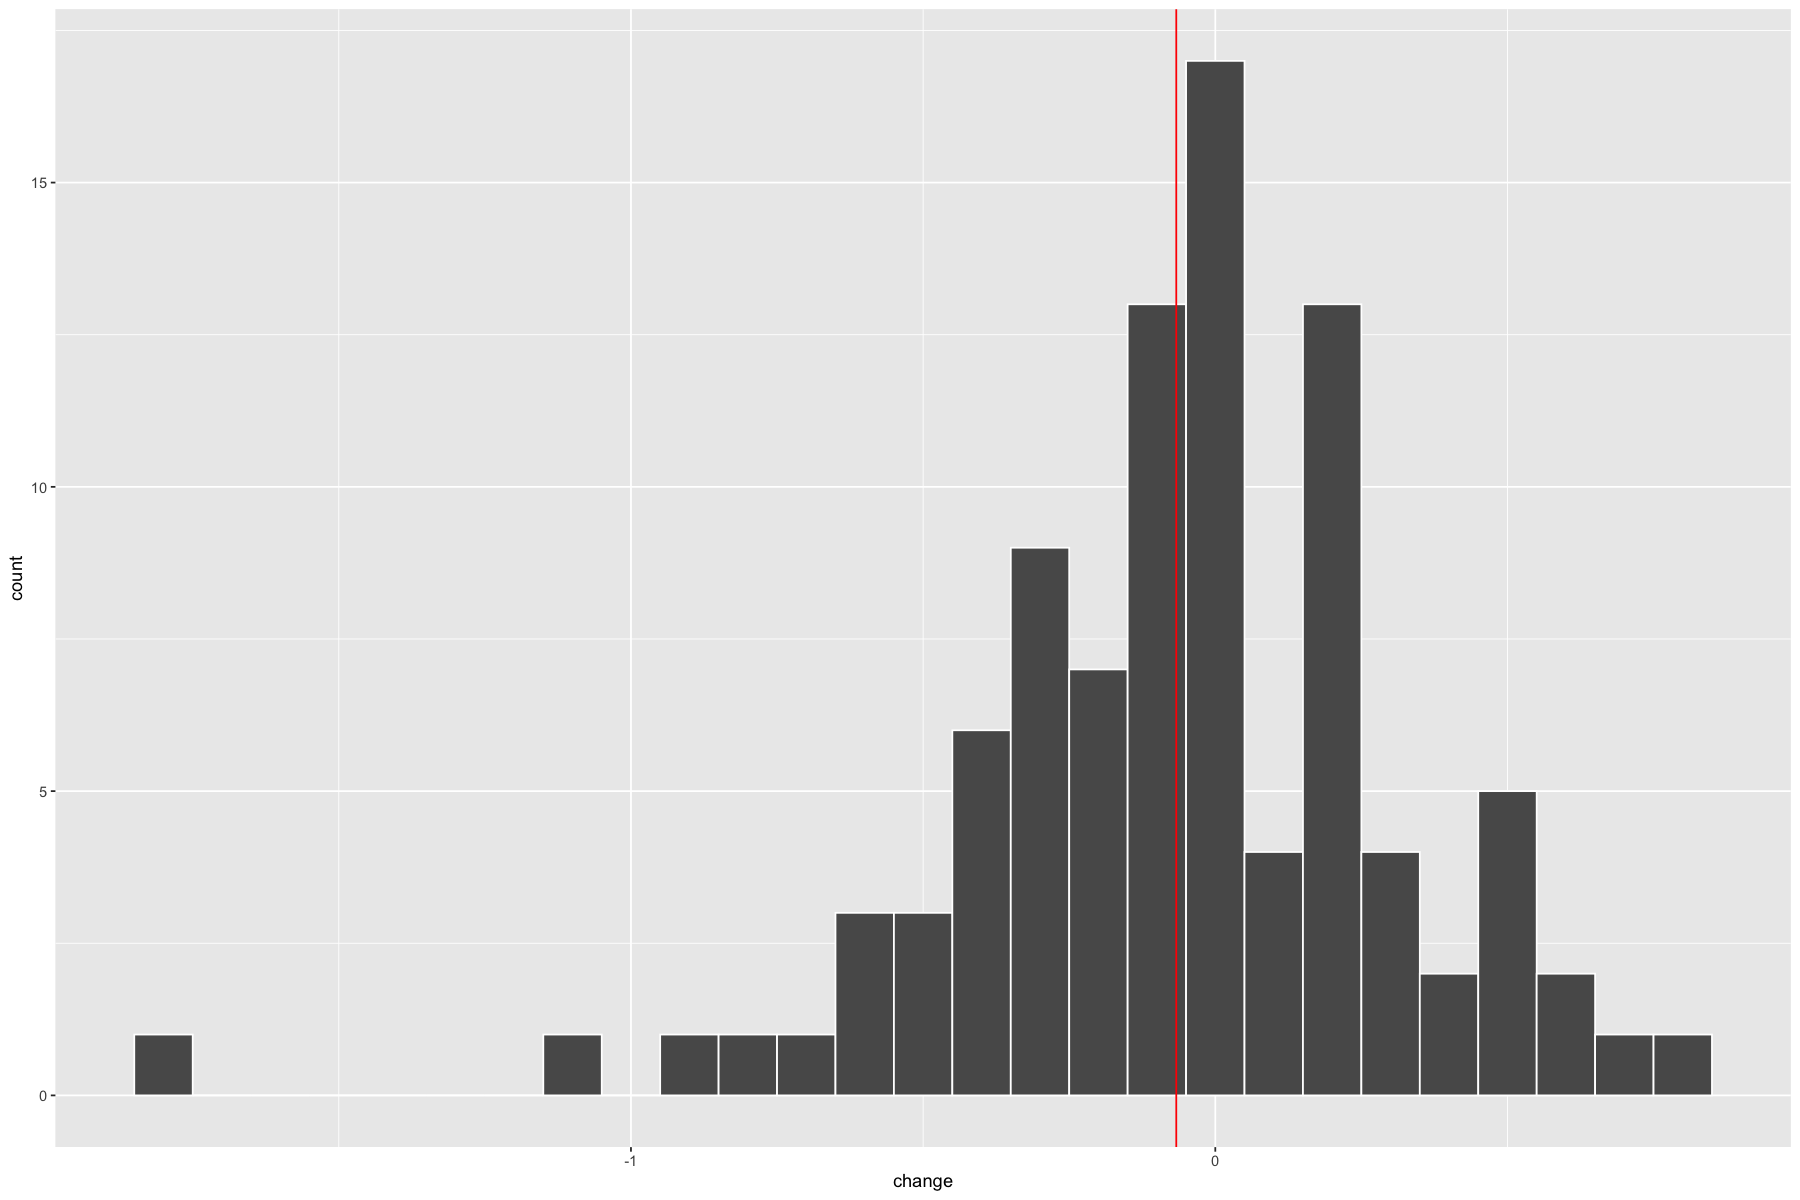

In [52]:
options(repr.plot.width = 15, repr.plot.height = 10) 
change_2019_2021 |>
    ggplot(aes(x=change)) +
    geom_histogram(binwidth = 0.1, color="white") +
    geom_vline(xintercept=mean(change_2019_2021$change),color="red")

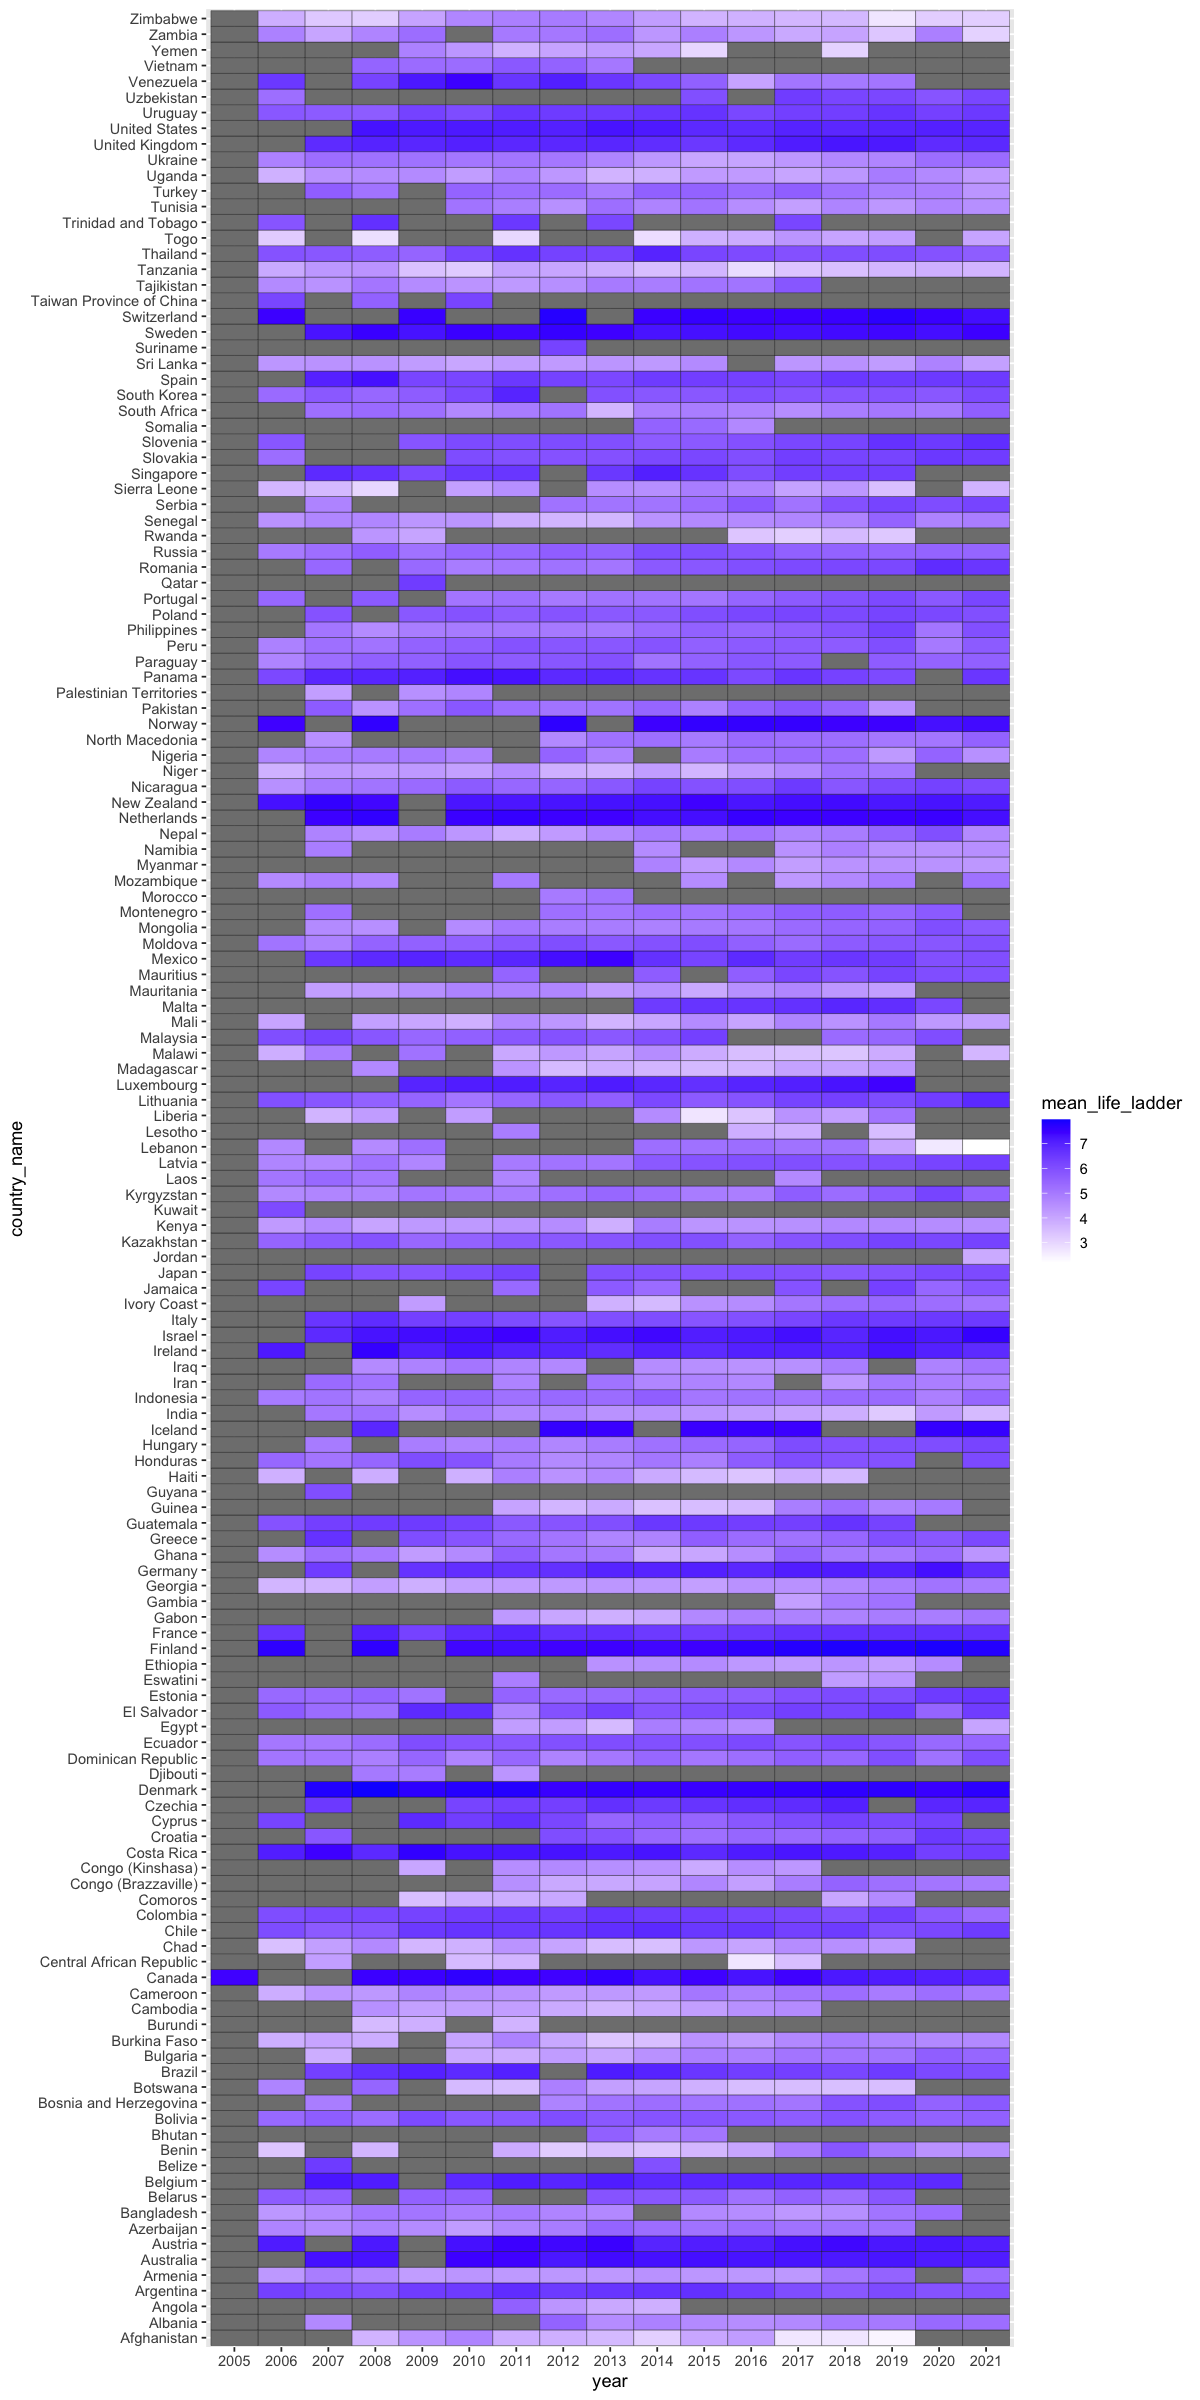

In [225]:
options(repr.plot.width = 10, repr.plot.height = 20) 

happiness_heatmap <- happiness_data_wide |>
    pivot_longer(cols=-country_name,names_to="year",values_to ="mean_life_ladder") |>
    ggplot(aes(x=year, y=country_name)) +
    geom_tile(aes(fill=mean_life_ladder), color="black") +
    scale_fill_gradient(low="white", high="#1818ff")

happiness_heatmap

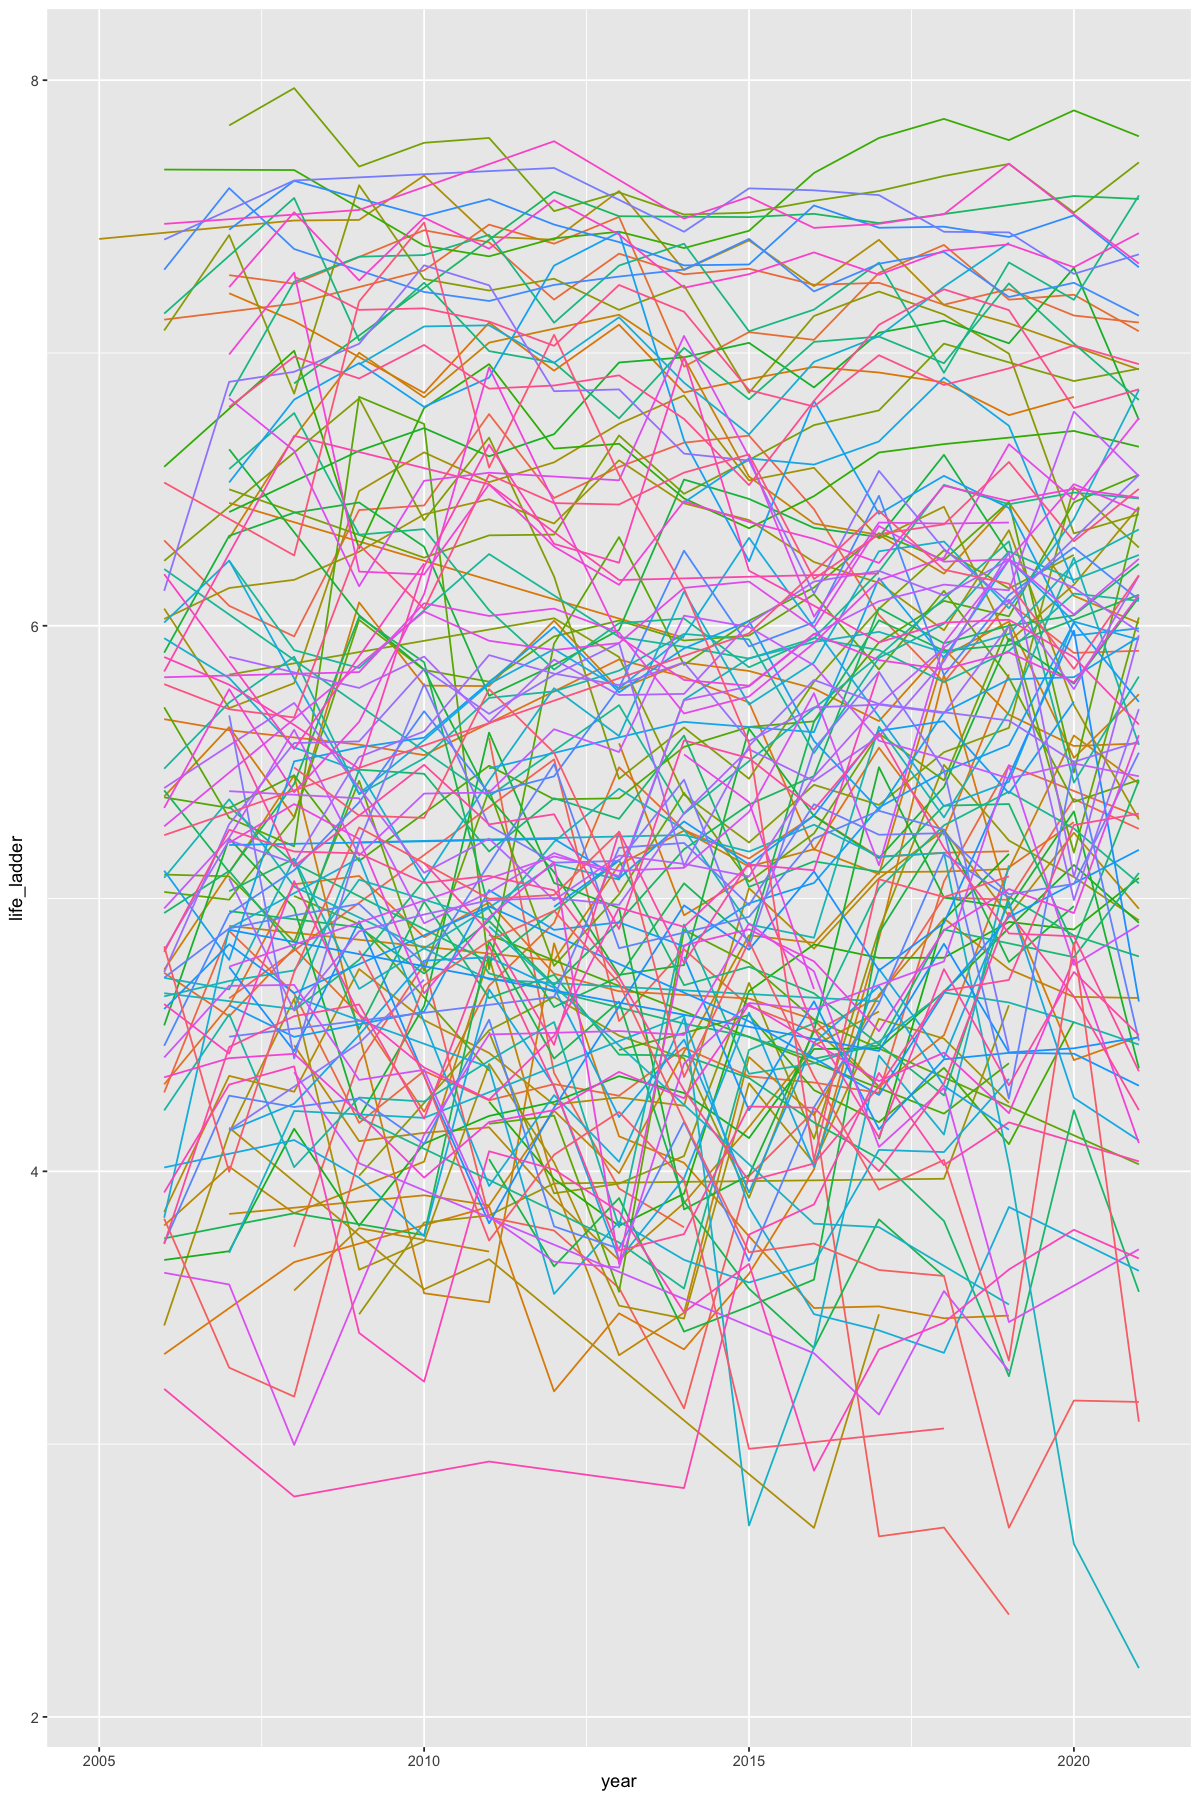

In [226]:
options(repr.plot.width = 10, repr.plot.height = 15) 

happiness_trail <- happiness_data |>
    ggplot(aes(x=year, y=life_ladder, group=country_name, color=country_name)) +
    geom_line(show.legend = FALSE)

happiness_trail

In [219]:
happiness_data |>
    filter(country_name == "Finland")

country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,confidence_in_national_government
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Finland,2006,7.672449,10.74532,0.9645628,68.72,0.9685805,-0.007057802,0.1324302,0.6828185,0.1721339,0.7579263
Finland,2008,7.670627,10.79585,0.9513399,69.16,0.9341789,0.025102580,0.2165675,0.6914337,0.1435387,0.7232435
Finland,2010,7.393264,10.73367,0.9354814,69.60,0.9160091,0.088641785,0.4125157,0.7580845,0.2020947,0.4618436
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Finland,2019,7.780348,10.79224,0.9374155,71.000,0.9476167,-0.05411919,0.1953384,0.7322823,0.1807329,0.6391882
Finland,2020,7.889350,10.76146,0.9616207,71.075,0.9624237,-0.11885314,0.1636359,0.7479391,0.1928976,0.8086329
Finland,2021,7.794378,10.79455,0.9702893,71.150,0.9631898,-0.03572844,0.1917537,0.7516117,0.1754486,0.7137312


### Summary Tables ###

In [3]:
# TODO:
# plot
# compute estimates.. table..

## Methods
___


TODO:
* "what ways is this report trust worthy?"
* "Explain the plots / estimates"
* "include at least one hypothesis test and CI"
* "compare both the bootstrapping and asymptotic methods"
* "how might the report play out?"
    1. what do you expect to find?
    2. what impact should such findings have?
    3. what future questions could this lead to?


## References
___

TODO:
"At least two citation and source of the data"
1. ... 

2. ...

3. ...
4. Source of Data: https://worldhappiness.report/ed/2021/